### Clustering Algorithm
##### Customer Segmentation based on marketing_campaign.csv

### Data Analysis

In [2]:
import pandas as pd

file_path = 'marketing_campaign.csv'
data = pd.read_csv(file_path, sep='\t')
num_records, num_features = data.shape
print("First 10 rows:")
print(data.head(10))
null_values = data.isnull().sum()
print("\nNumber of nulls:")
print(null_values)
print("\nTypes of data:")
print(data.dtypes)


First 10 rows:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...               

#### Data Processing

In [3]:
# Cleaning Data
# Drop null values
data_cleaned = data.dropna().copy()
# New attribute [Age] = 2023 - Year_Birth 
data_cleaned['Age'] = 2023 - data_cleaned['Year_Birth']
# New attribute [TotalAmountSpent]
data_cleaned['TotalAmountSpent'] = data_cleaned['MntFishProducts'] + data_cleaned['MntFruits'] + data_cleaned['MntGoldProds'] + data_cleaned['MntSweetProducts'] + data_cleaned['MntMeatProducts'] + data_cleaned['MntWines']
# Drop symbolic values
data_processed = data_cleaned.drop(['ID', 'Education', 'Marital_Status', 'Dt_Customer', 'Year_Birth'], axis=1)
# Show
num_records_processed, num_features_processed = data_processed.shape
print(f"Number of records: {num_records_processed}, number of features: {num_features_processed}")
null_values = data_processed.isnull().sum().sum()
print(f"Number of null values: {null_values}")


Number of records: 2216, number of features: 26
Number of null values: 0


In [7]:
from sklearn.preprocessing import StandardScaler

# Data standardization
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_processed)

### K-means


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(data_normalized)
silhouette_score = silhouette_score(data_normalized, clusters)
print(f"Kmeans with 5 clusters: {silhouette_score}")

Kmeans with 5 clusters: 0.1172623227326665


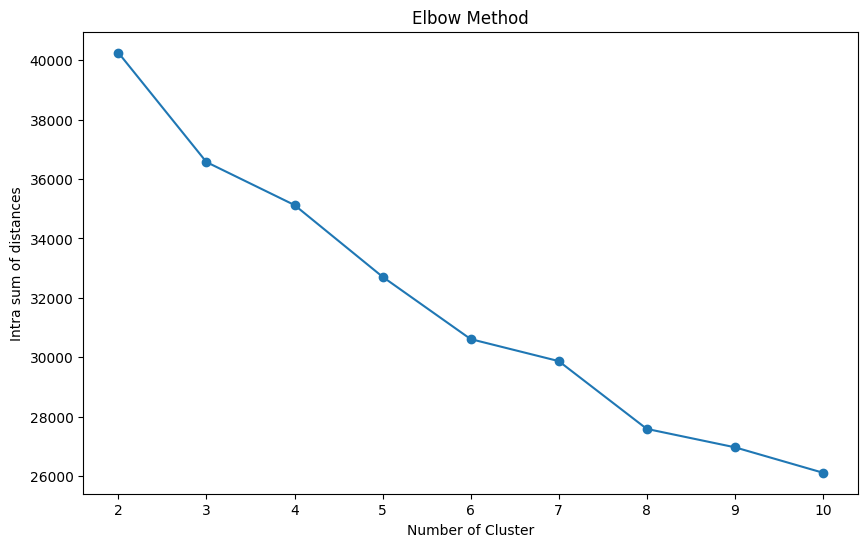

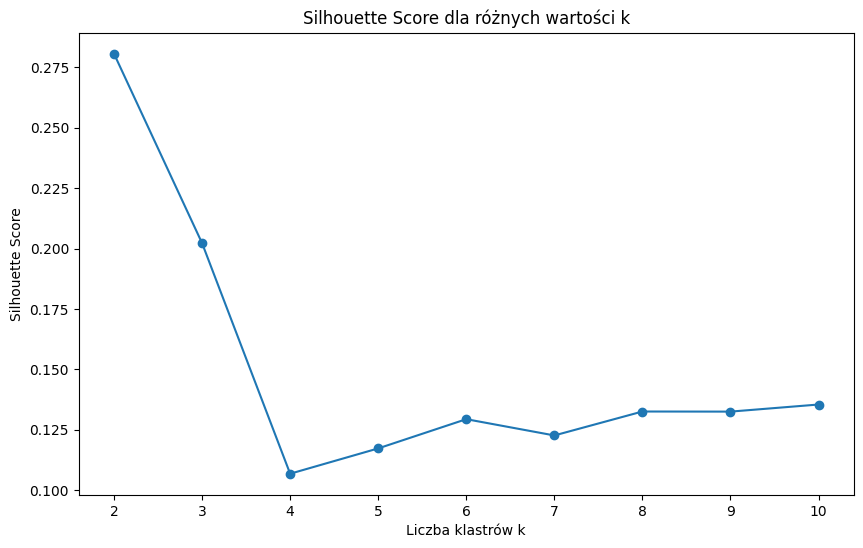

[40257.62164949804, 36573.52975051303, 35125.08371410576, 32708.29722903869, 30609.30804717825, 29867.85933011312, 27583.732729652475, 26964.39817061837, 26107.412718053587]
[0.28068206139662116, 0.2022488207620317, 0.10677827396691977, 0.1172623227326665, 0.1293645231984933, 0.12262505712043165, 0.1325380855194599, 0.1324937070488138, 0.13543412762328583]


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []

# Lista do przechowywania sum kwadratów odległości wewnątrz klastrów (inertia)
intra_sum_of_square_list = []


# Zakres k, który chcemy przetestować
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(data_normalized)
    
    intra_sum_of_square_list.append(kmeans.inertia_)
    silhouette = silhouette_score(data_normalized, clusters)
    silhouette_scores.append(silhouette)

# Wykres Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, intra_sum_of_square_list, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Intra sum of distances')
plt.show()

# Wykres Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score dla różnych wartości k')
plt.xlabel('Liczba klastrów k')
plt.ylabel('Silhouette Score')
plt.show()

print(intra_sum_of_square_list)
print(silhouette_scores)

[ 0.2340627  -0.82303932 -0.92897224  0.31053212  0.97822575  1.54942946
  1.69022683  2.45456767  1.48482696  0.85003057  0.35171348  1.42855332
  2.50471216 -0.55414289  0.69323197 -0.28177297 -0.28270484 -0.28083892
 -0.26166148 -0.11714818 -0.09781206  0.          0.          2.37795178
  0.98644293  1.67548812]


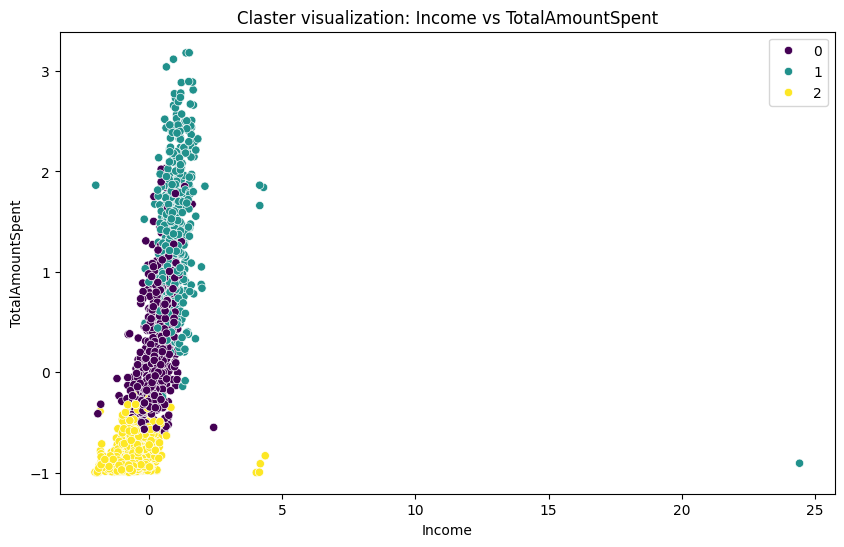

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data_normalized)
print(data_normalized[0])
data_df = pd.DataFrame(data_normalized, columns=[ 'Income',	'Kidhome',	'Teenhome',	'Recency',	'MntWines',	'MntFruits',	'MntMeatProducts',	'MntFishProducts',	'MntSweetProducts',	'MntGoldProds',	'NumDealsPurchases',	'NumWebPurchases',	'NumCatalogPurchases',	'NumStorePurchases',	'NumWebVisitsMonth',	'AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',	'AcceptedCmp2',	'Complain',	'Z_CostContact',	'Z_Revenue',	'Response', 'Age', 'TotalAmountSpent', 
])


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalAmountSpent', hue=clusters, data=data_df, palette='viridis')
plt.title('Claster visualization: Income vs TotalAmountSpent')
plt.xlabel('Income')
plt.ylabel('TotalAmountSpent')
plt.show()